In [1]:
import pandas as pd

In [2]:
#About this file
schema = {"longitude": "A measure of how far west a house is; a higher value is farther west",
    "latitude": "A measure of how far north a house is; a higher value is farther north",
    "housing_median_age": "Median age of a house within a block; a lower number is a newer building",
    "total_rooms": "Total number of rooms within a block",
    "total_bedrooms": "Total number of bedrooms within a block",
    "population": "Total number of people residing within a block",
    "households": "Total number of households, a group of people residing within a home unit, for a block",
    "median_income": "Median income for households within a block of houses (measured in tens of thousands of US Dollars)",
    "median_house_value": "Median house value for households within a block (measured in US Dollars)",
    "ocean_proximity": "Location of the house w.r.t ocean/sea",
    }
    

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

In [ ]:
df_age = df["housing_median_age"]

In [7]:
import seaborn as sns

In [8]:
sns.set(style='darkgrid',
        palette='viridis',
        font_scale=1,
        font='calibri',
        rc={'figure.figsize':(10,10), "legend.fontsize": 14})

sns.set_context("paper", rc={
    "lines.linewidth": 1.5,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

In [ ]:
sns.histplot(data=df, x="housing_median_age",
            binwidth= 5,
            kde = True)
sns.histplot(data=df, x="housing_median_age",
            binwidth= 2,
            kde = True)

   - we can assume that it is probably a bimodal distribution: there is a peak inbetween 15 and 20; 30 and 35 and there is a rise after 50

### housing median age and total bedrooms

In [ ]:
df.columns

In [ ]:
sns.scatterplot(data=df,
                x='latitude',
                y='longitude',
                hue = 'median_house_value',
                palette = 'inferno',
                )
                

In [ ]:
df.ocean_proximity.value_counts()

In [9]:
df1 = df.join(pd.get_dummies(df.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:>

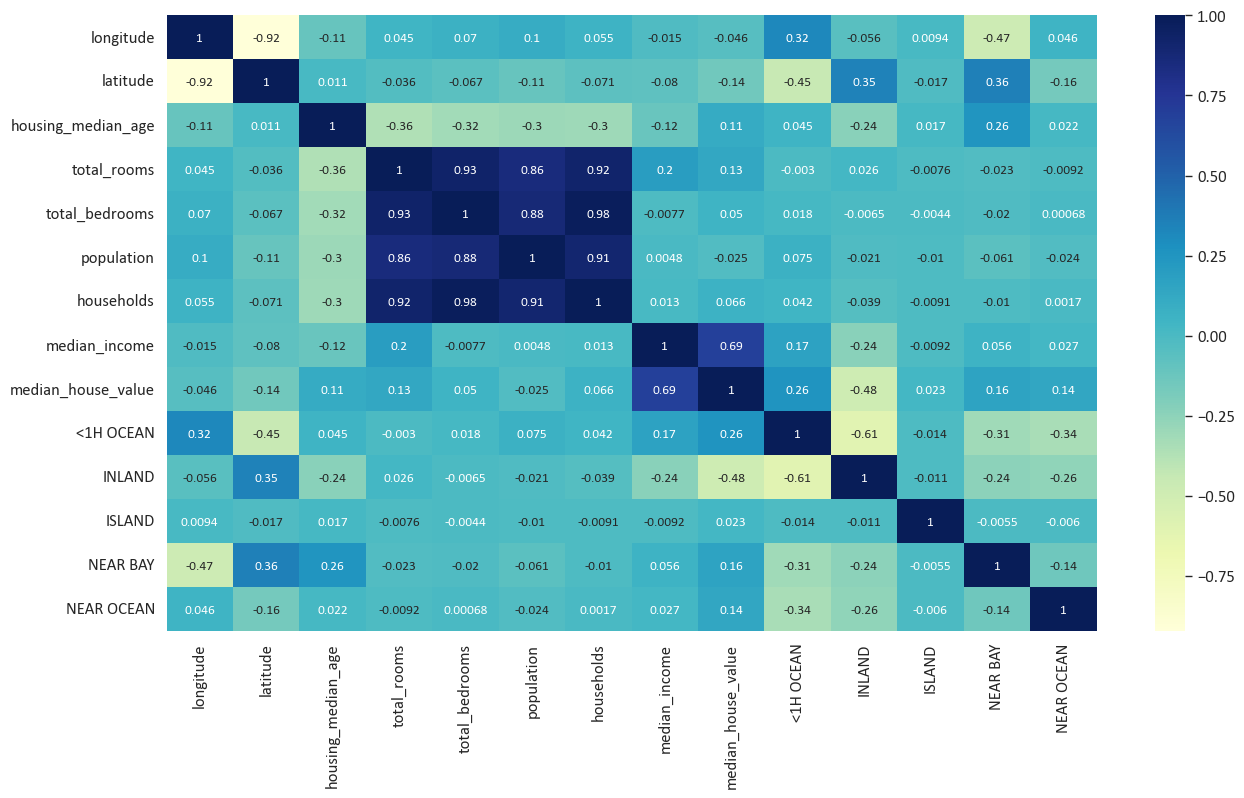

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(),
           annot=True,
           cmap = "YlGnBu")

# Dealing with Skewness

In [12]:
import numpy as np

In [13]:
df1["total_rooms"] = np.log(df1["total_rooms"] + 1)
df1["total_bedrooms"] = np.log(df1["total_bedrooms"] + 1)
df1["population"] = np.log(df1["population"] + 1)
df1["households"] = np.log(df1["households"] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

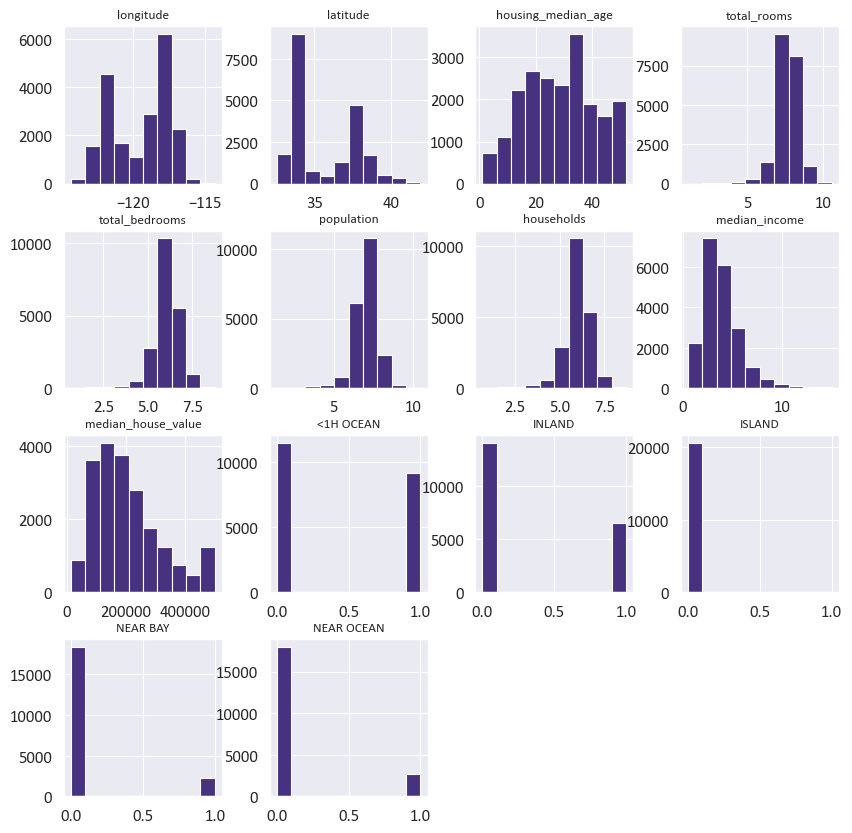

In [14]:
df1.hist()

# Feature Engineering

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


## a feature for the average number of rooms per household, or the average number of bedrooms per room.

In [16]:
df1["average_rooms"] = df1["total_rooms"]/df1["households"]
df1["average_bedrooms"] = df1["total_bedrooms"]/df1["total_rooms"]

<AxesSubplot:>

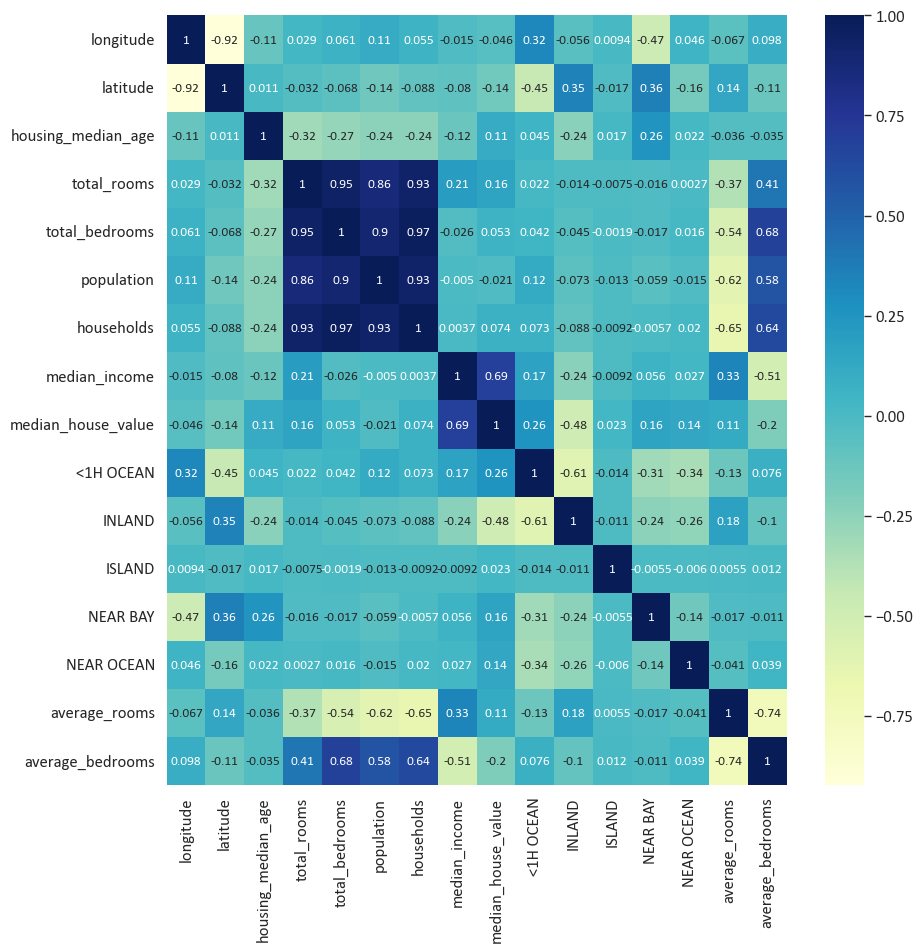

In [17]:
sns.heatmap(df1.corr(),
           annot = True,
           cmap = "YlGnBu")

## Bin numerical features into discrete categories. For example, you could create a categorical feature for housing_median_age, such as "young", "middle-aged", and "old".

In [ ]:
df3 = pd.DataFrame()

In [ ]:
df3["housing_median_age"] = train_data["housing_median_age"]

In [ ]:
bins = [0, 20, 40, 60]
labels = ["young", "middle-aged", "old"]

In [ ]:
df3["cat_age"] = pd.cut(df3["housing_median_age"],
                       bins = bins,
                       labels = labels)

In [ ]:
train_data1 = train_data

In [ ]:
train_data1 = train_data1.drop("housing_median_age", axis = 1)

In [ ]:
train_data1 = train_data1.join(df3)

In [ ]:
train_data1.columns

In [ ]:
import plotly.express as px

In [ ]:
px.box(data_frame = train_data1,
               y = "cat_age",
               x = "housing_median_age",
            )

In [ ]:
df1.info()

# ML MODEL

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# remove rows with missing values
df1.dropna(inplace=True)

# separate target variable
x, y = df1.drop('median_house_value', axis=1), df1['median_house_value']

# split the data into training and testing setx
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scale the training data using standard scaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

# create the linear regression object and fit the model to the training data
reg = LinearRegression()
reg.fit(x_train_s, y_train)

# evaluate the performance of the model on the training data
score_train = reg.score(x_train_s, y_train)
print("Training score: {:.2f}".format(score_train))

# scale the test data using the same scaler used for training data
x_test_s = scaler.transform(x_test)

# evaluate the performance of the model on the test data
score_test = reg.score(x_test_s, y_test)
print("Test score: {:.2f}".format(score_test))

# make predictions on the test data and create a dataframe
y_pred = reg.predict(x_test_s)
predictions_df = pd.DataFrame({'predicted_values': y_pred, 'actual_values': y_test})

# display the dataframe
print(predictions_df.head())


Training score: 0.67
Test score: 0.67
       predicted_values  actual_values
14416     230764.772614       245800.0
16383     149941.727541       137900.0
7731      208835.388274       218200.0
1410      171317.279827       220800.0
1335      225062.311683       170500.0


In [27]:
predictions_df['error_rate'] = ((predictions_df['predicted_values'] - predictions_df['actual_values']) / predictions_df['actual_values']) * 100
predictions_df.head(15)

,predicted_values,actual_values,error_rate
14416,241069.01,245800.0,-1.924731
16383,147184.00,137900.0,6.732415
7731,193614.00,218200.0,-11.267644
1410,137680.00,220800.0,-37.644928
1335,160005.99,170500.0,-6.154845
16260,73725.00,75000.0,-1.700000
18011,271574.00,269400.0,0.806978
10086,209412.00,228900.0,-8.513761
18294,473566.63,500001.0,-5.286863
18733,69447.00,80800.0,-14.050743


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))


Mean Absolute Error: 48660.76
Mean Squared Error: 4530030653.76
Root Mean Squared Error: 67305.50


<AxesSubplot:xlabel='actual_values', ylabel='predicted_values'>

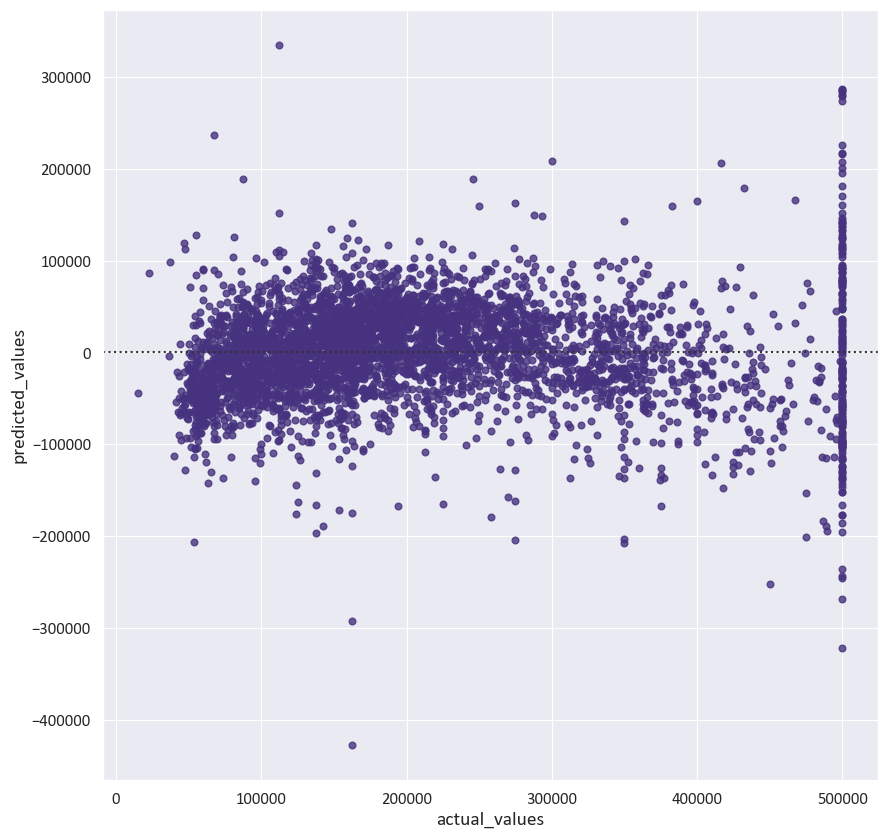

In [22]:

sns.residplot(data = predictions_df,
               x = "actual_values",
               y = "predicted_values")

In [23]:
from sklearn.ensemble import RandomForestRegressor

# remove rows with missing values
df1.dropna(inplace=True)

# separate target variable
x, y = df1.drop('median_house_value', axis=1), df1['median_house_value']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scale the training data using standard scaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

# create the random forests regressor object and fit the model to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(x_train_s, y_train)

# evaluate the performance of the model on the training data
score_train = reg.score(x_train_s, y_train)
print("Training score: {:.2f}".format(score_train))

# scale the test data using the same scaler used for training data
x_test_s = scaler.transform(x_test)

# evaluate the performance of the model on the test data
score_test = reg.score(x_test_s, y_test)
print("Test score: {:.2f}".format(score_test))

# make predictions on the test data and create a dataframe
y_pred = reg.predict(x_test_s)
predictions_df = pd.DataFrame({'predicted_values': y_pred, 'actual_values': y_test})

# display the dataframe
print(predictions_df.head())


Training score: 0.97
Test score: 0.82
       predicted_values  actual_values
14416         241069.01       245800.0
16383         147184.00       137900.0
7731          193614.00       218200.0
1410          137680.00       220800.0
1335          160005.99       170500.0


In [28]:
predictions_df['error_rate'] = ((predictions_df['predicted_values'] - predictions_df['actual_values']) / predictions_df['actual_values']) * 100
predictions_df.head(15)

,predicted_values,actual_values,error_rate
14416,241069.01,245800.0,-1.924731
16383,147184.00,137900.0,6.732415
7731,193614.00,218200.0,-11.267644
1410,137680.00,220800.0,-37.644928
1335,160005.99,170500.0,-6.154845
16260,73725.00,75000.0,-1.700000
18011,271574.00,269400.0,0.806978
10086,209412.00,228900.0,-8.513761
18294,473566.63,500001.0,-5.286863
18733,69447.00,80800.0,-14.050743


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Mean Absolute Error: 32585.67
Mean Squared Error: 2471219100.63
Root Mean Squared Error: 49711.36


<AxesSubplot:xlabel='actual_values', ylabel='predicted_values'>

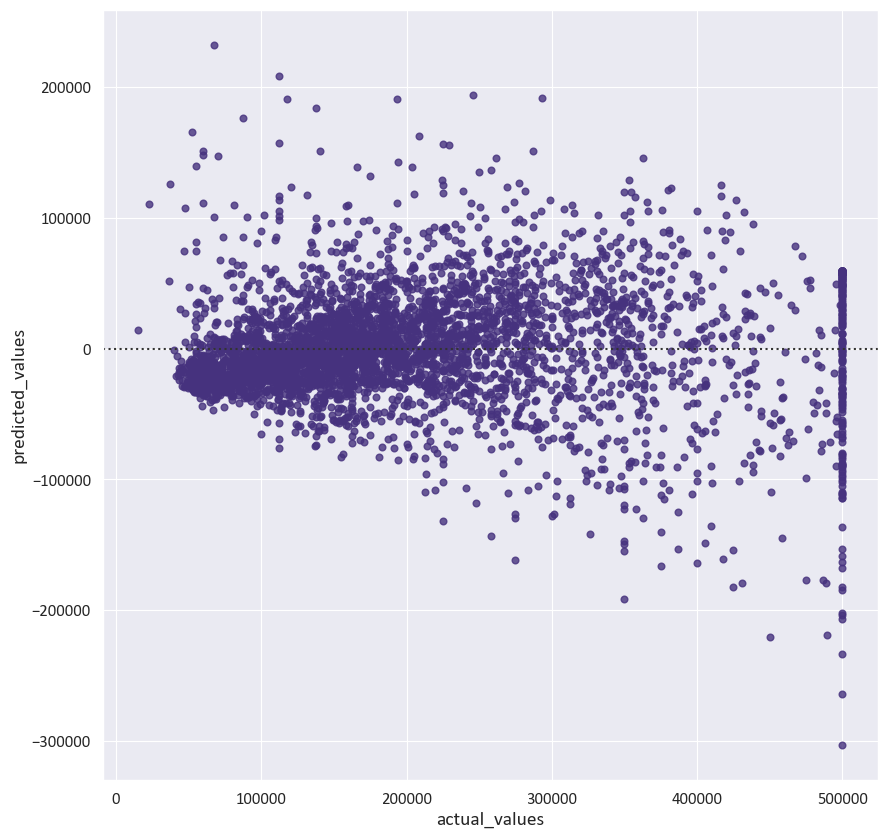

In [25]:
sns.residplot(data = predictions_df,
               x = "actual_values",
               y = "predicted_values")

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# remove rows with missing values
df1.dropna(inplace=True)

# separate target variable
x, y = df1.drop('median_house_value', axis=1), df1['median_house_value']

# split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# create the random forest classifier object and fit the model to the training data
rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfc.fit(x_train, y_train)

# evaluate the performance of the model on the training data
score_train = rfc.score(x_train, y_train)
print("Training score: {:.2f}".format(score_train))

# evaluate the performance of the model on the test data
score_test = rfc.score(x_test, y_test)
print("Test score: {:.2f}".format(score_test))

# make predictions on the test data and print the classification report
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))


MemoryError: could not allocate 15040512 bytes

In [52]:
predictions_df['error_rate'] = ((predictions_df['predicted_values'] - predictions_df['actual_values']) / predictions_df['actual_values']) * 100
predictions_df.head(15)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))

In [ ]:
sns.residplot(data = predictions_df,
               x = "actual_values",
               y = "predicted_values")